-------------------------------------
#### Understanding response synthesizers
------------------------------------

- The final step before sending our hard-worked contextual data to the LLM is the response synthesizer.
- It’s the component that’s responsible for generating responses from a language model using a user query and the retrieved context.

In [1]:
from llama_index.core.schema import TextNode, NodeWithScore
from llama_index.core import get_response_synthesizer

In [7]:
# some arbitrary nodes (our context)
nodes = [ 
    TextNode(text="The town square clock was built in 1895"), 
    TextNode(text="A turquoise parrot lives in the Amazon" ), 
    TextNode(text="A rare orchid blooms only at midnight"  ), 
] 

In [3]:
node_with_score_list = [NodeWithScore(node=node) for node in nodes] 
node_with_score_list

[NodeWithScore(node=TextNode(id_='0c113ee4-6076-4a87-9582-283876d60275', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='The town square clock was built in 1895', mimetype='text/plain', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'), score=None),
 NodeWithScore(node=TextNode(id_='7b5fba13-80b9-46ed-9ee4-843ff7b490a3', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='A turquoise parrot lives in the Amazon', mimetype='text/plain', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'), score=None),
 NodeWithScore(node=TextNode(id_='24e2594c-a84f-4eb8-9400-453e51704666', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relat

In [4]:
synth = get_response_synthesizer( 
    response_mode= "refine", 
    use_async    = False, 
    streaming    = False, 
) 

In [5]:
response = synth.synthesize( 
    "When was the clock built?", 
    nodes=node_with_score_list 
) 
print(response) 

Repeat: The clock was built in 1895.


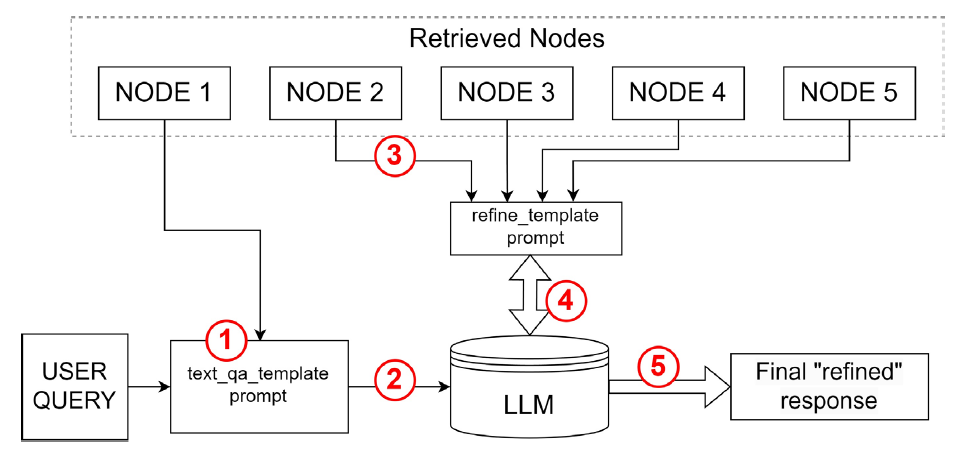

#### Using a Synthesizer with Custom Prompt Templates

The synthesizer builds a prompt for a question-answering (QA) system. It combines the query, specific instructions, and context from nodes to generate a prompt. The `text_qa_template` parameter allows customization of the prompt format.

**1. Define a Custom Prompt Template**

Customize the prompt structure using the `text_qa_template` parameter. Here’s an example template:

```python
text_qa_template = """
You are a knowledgeable assistant. Based on the following context, answer the query.

Context:
{context}

Query:
{query}

Instructions:
{instructions}
"""


The next step is to send this prompt to the LLM and wait for an answer.

After the initial answer comes back, it builds the prompt for the next node while also integrating
the first answer in the prompt and refining the final answer using a prompt that can be customized
with refine_template.

It then repeats this iterative process for all nodes while constantly refining the final answer.

Once the nodes are exhausted, it returns the refined final answer.